In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

In [3]:
# importing dataset 
df=pd.read_csv('/Users/mohit/Downloads/insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [5]:
# checking for the size of the dataset
df.size

10704

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


Observation 
1.) min age 18 years and max age 64 years.
2.) bmi ranges between 15.96 & 53.13

In [8]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

No null values, Hence dataset is clean 
we directly need to apply feature Engineering on the data 

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Problem Statement
---Using Proper model try to predict the insurance claim.

In [10]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
195,19,1,30.59,0,0,1,1639.5631,1
581,19,1,30.59,0,0,1,1639.5631,1


In [11]:
df=df.drop_duplicates()

In [12]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim


we have dropped the duplicates here 

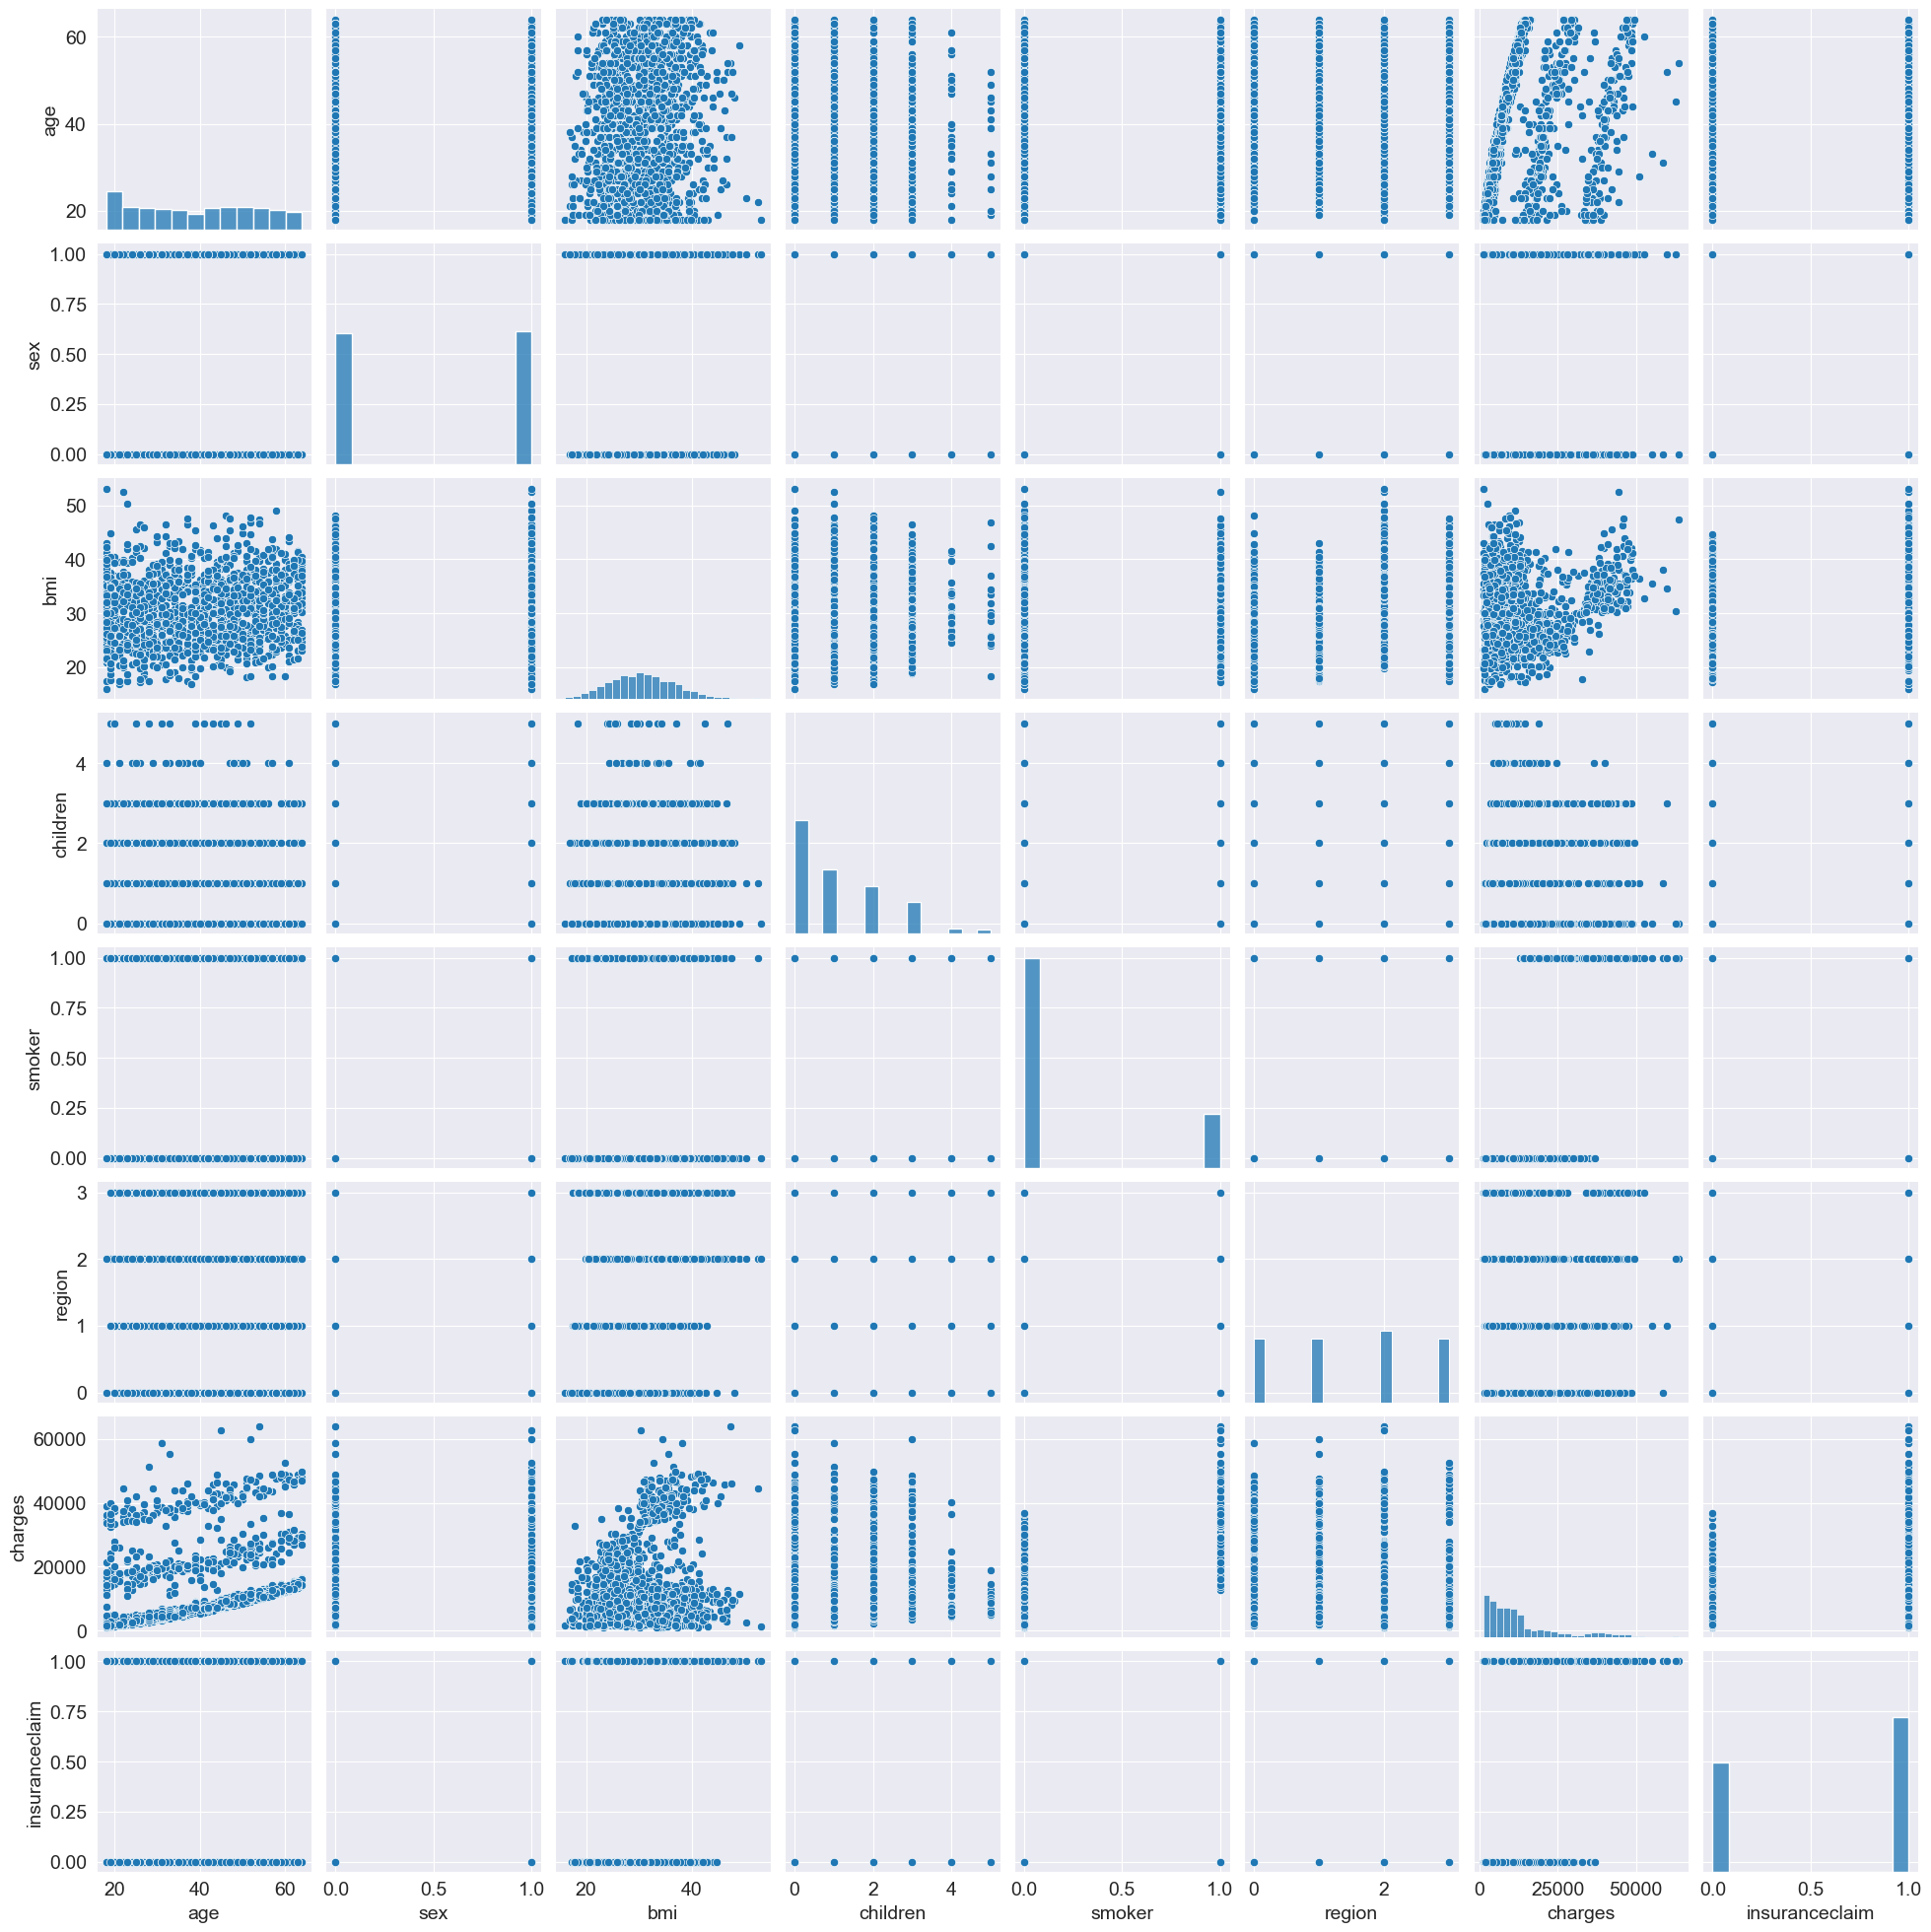

In [13]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

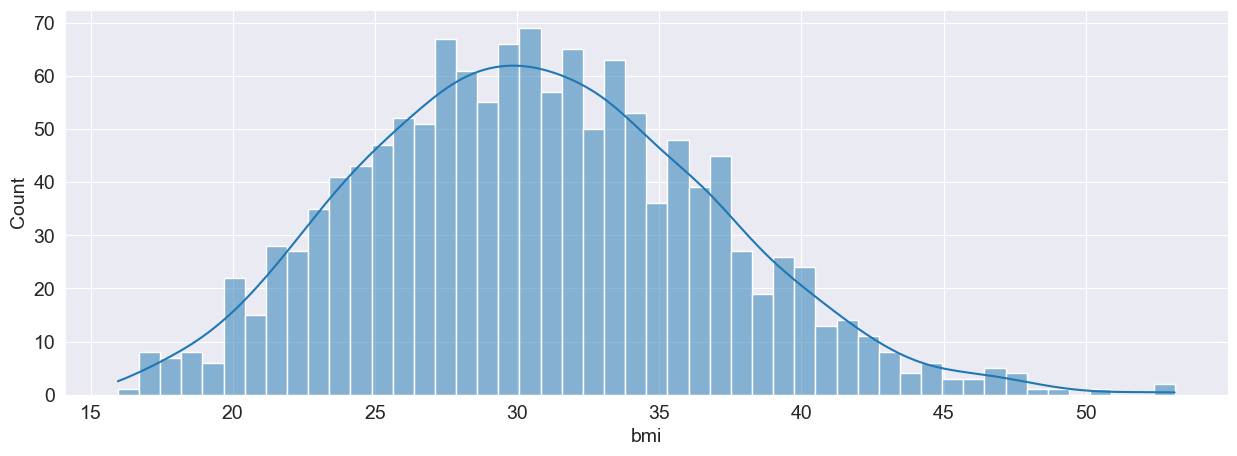

In [14]:
sns.histplot(data=df, x='bmi', bins=50, kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

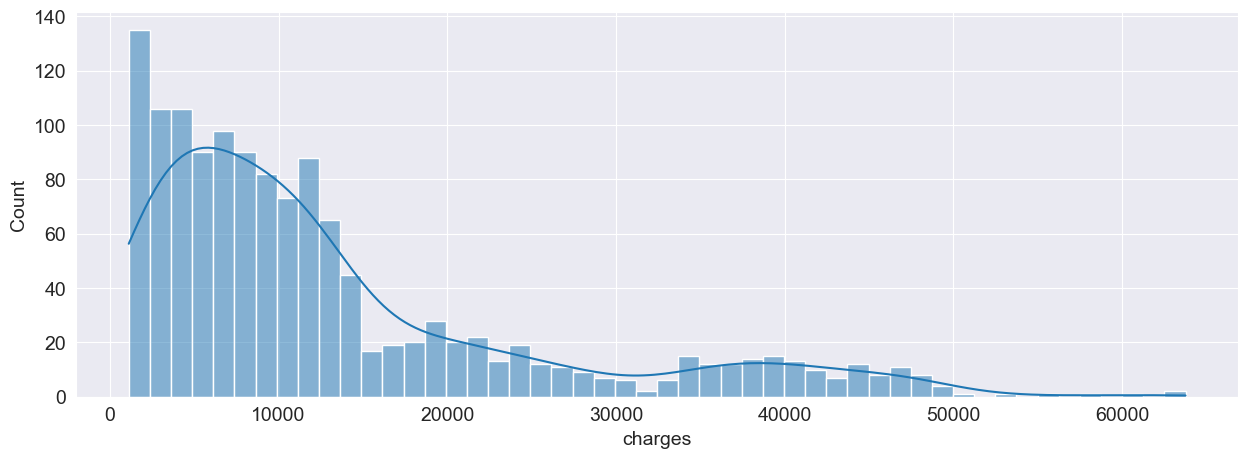

In [15]:
 sns.histplot(data=df, x='charges', bins=50 ,kde=True)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

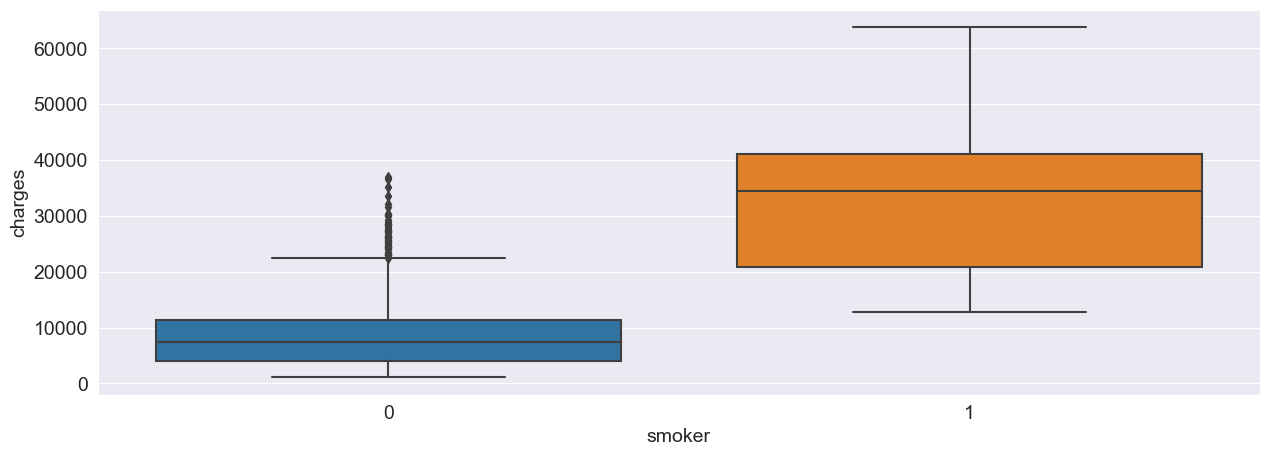

In [16]:
sns.boxplot(data=df, x='smoker', y='charges')

AttributeError: 'Rectangle' object has no property 'figdize'

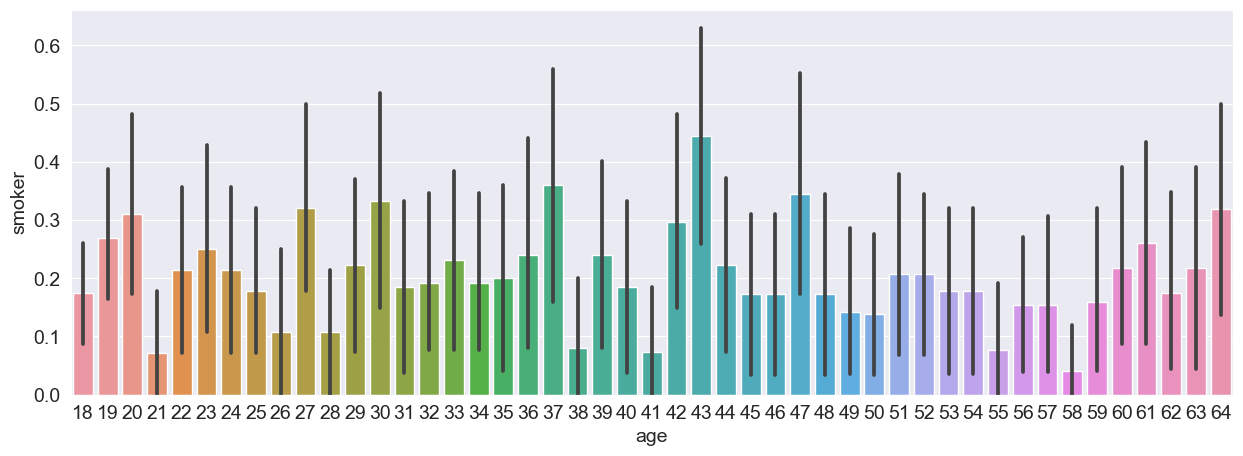

In [17]:
sns.barplot(data=df,x='age',y='smoker')
sns.barplot(figdize=(10,6))
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)

<AxesSubplot:xlabel='age', ylabel='smoker'>

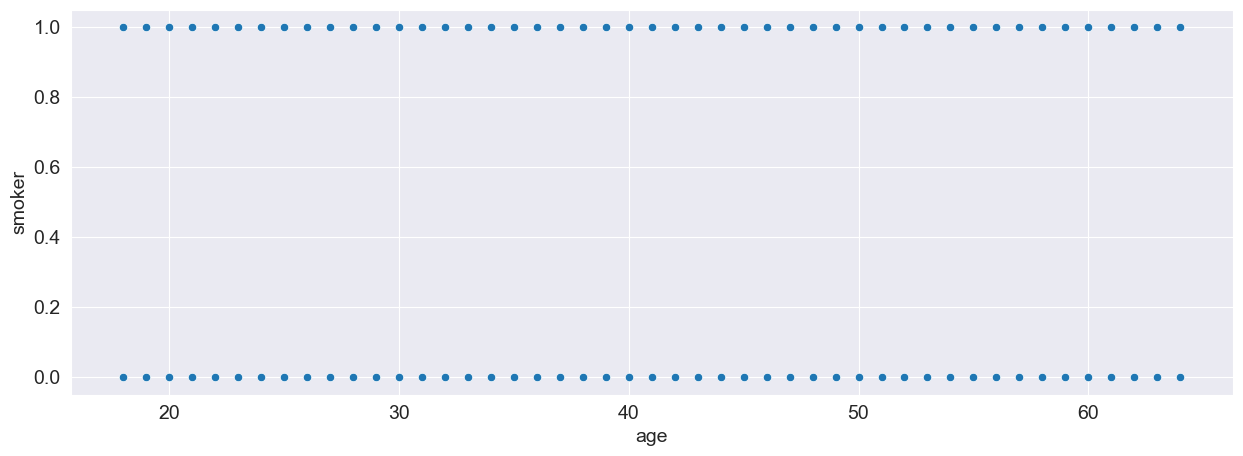

In [ ]:
sns.scatterplot(data=df,x='age',y='smoker')

<AxesSubplot:xlabel='insuranceclaim', ylabel='smoker'>

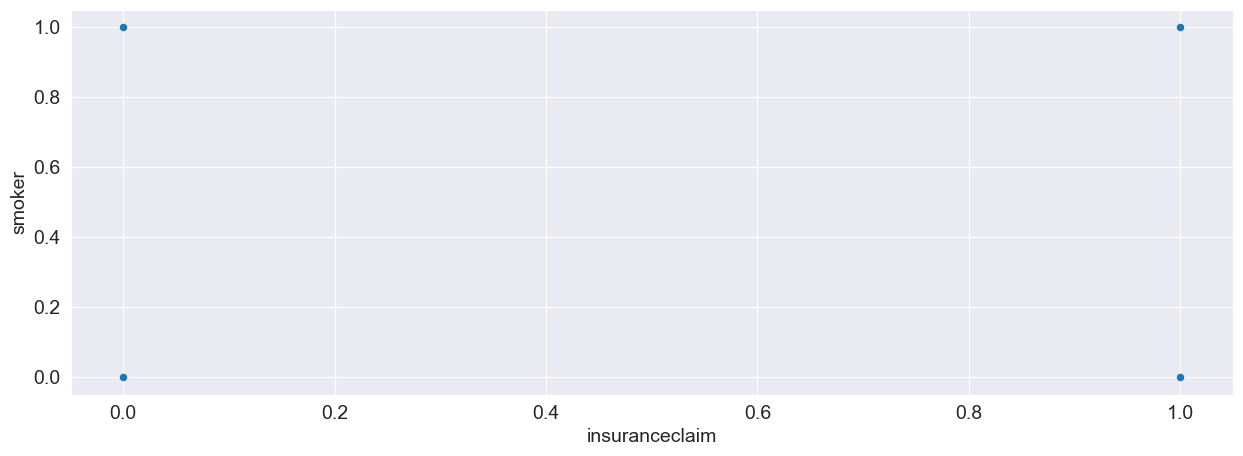

In [ ]:
sns.scatterplot(data=df,x='insuranceclaim',y='smoker')

In [ ]:
df.sex.value_counts()

1    675
0    662
Name: sex, dtype: int64

In [ ]:
df.insuranceclaim.value_counts()

1    782
0    555
Name: insuranceclaim, dtype: int64

In [ ]:
# Feature Engineering: Create 'weight_condition' to see better see bmi importance

df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"

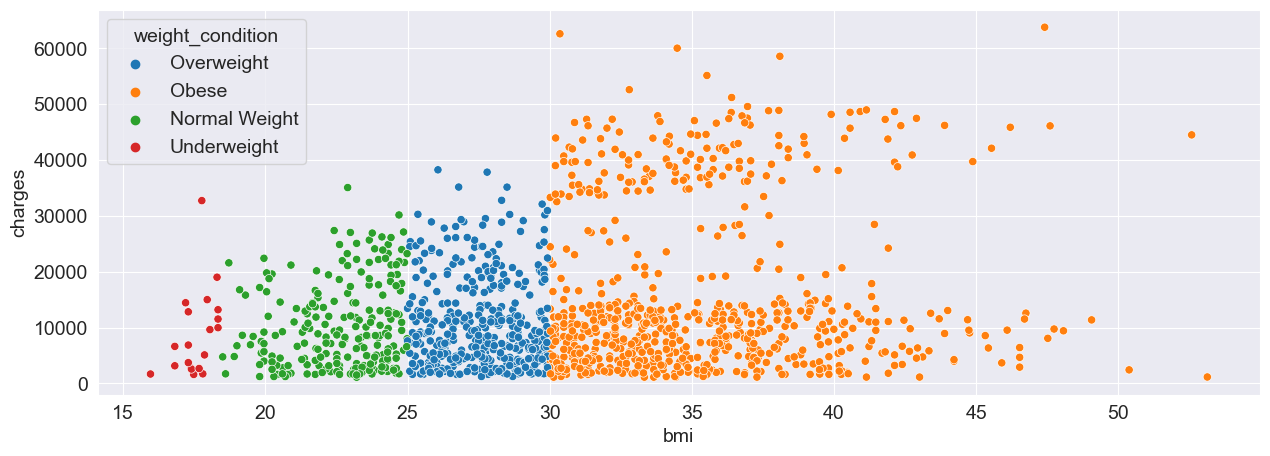

In [ ]:
sns.scatterplot(x="bmi", y="charges", hue="weight_condition", data=df)
plt.show()

with above observation:

1.) most of the people lie in obese category and have high amount of charges.
2.) after obese charges are high for overweight 
3.) underweight has very low mnumber value counts and charges are also low for this category

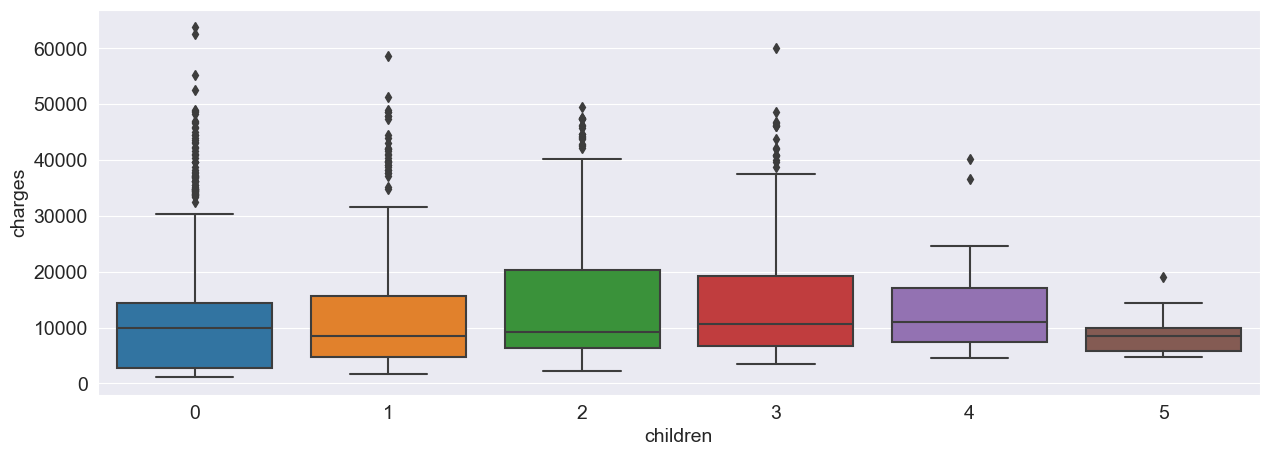

In [ ]:
sns.boxplot(x=df['children'],y=df['charges']);

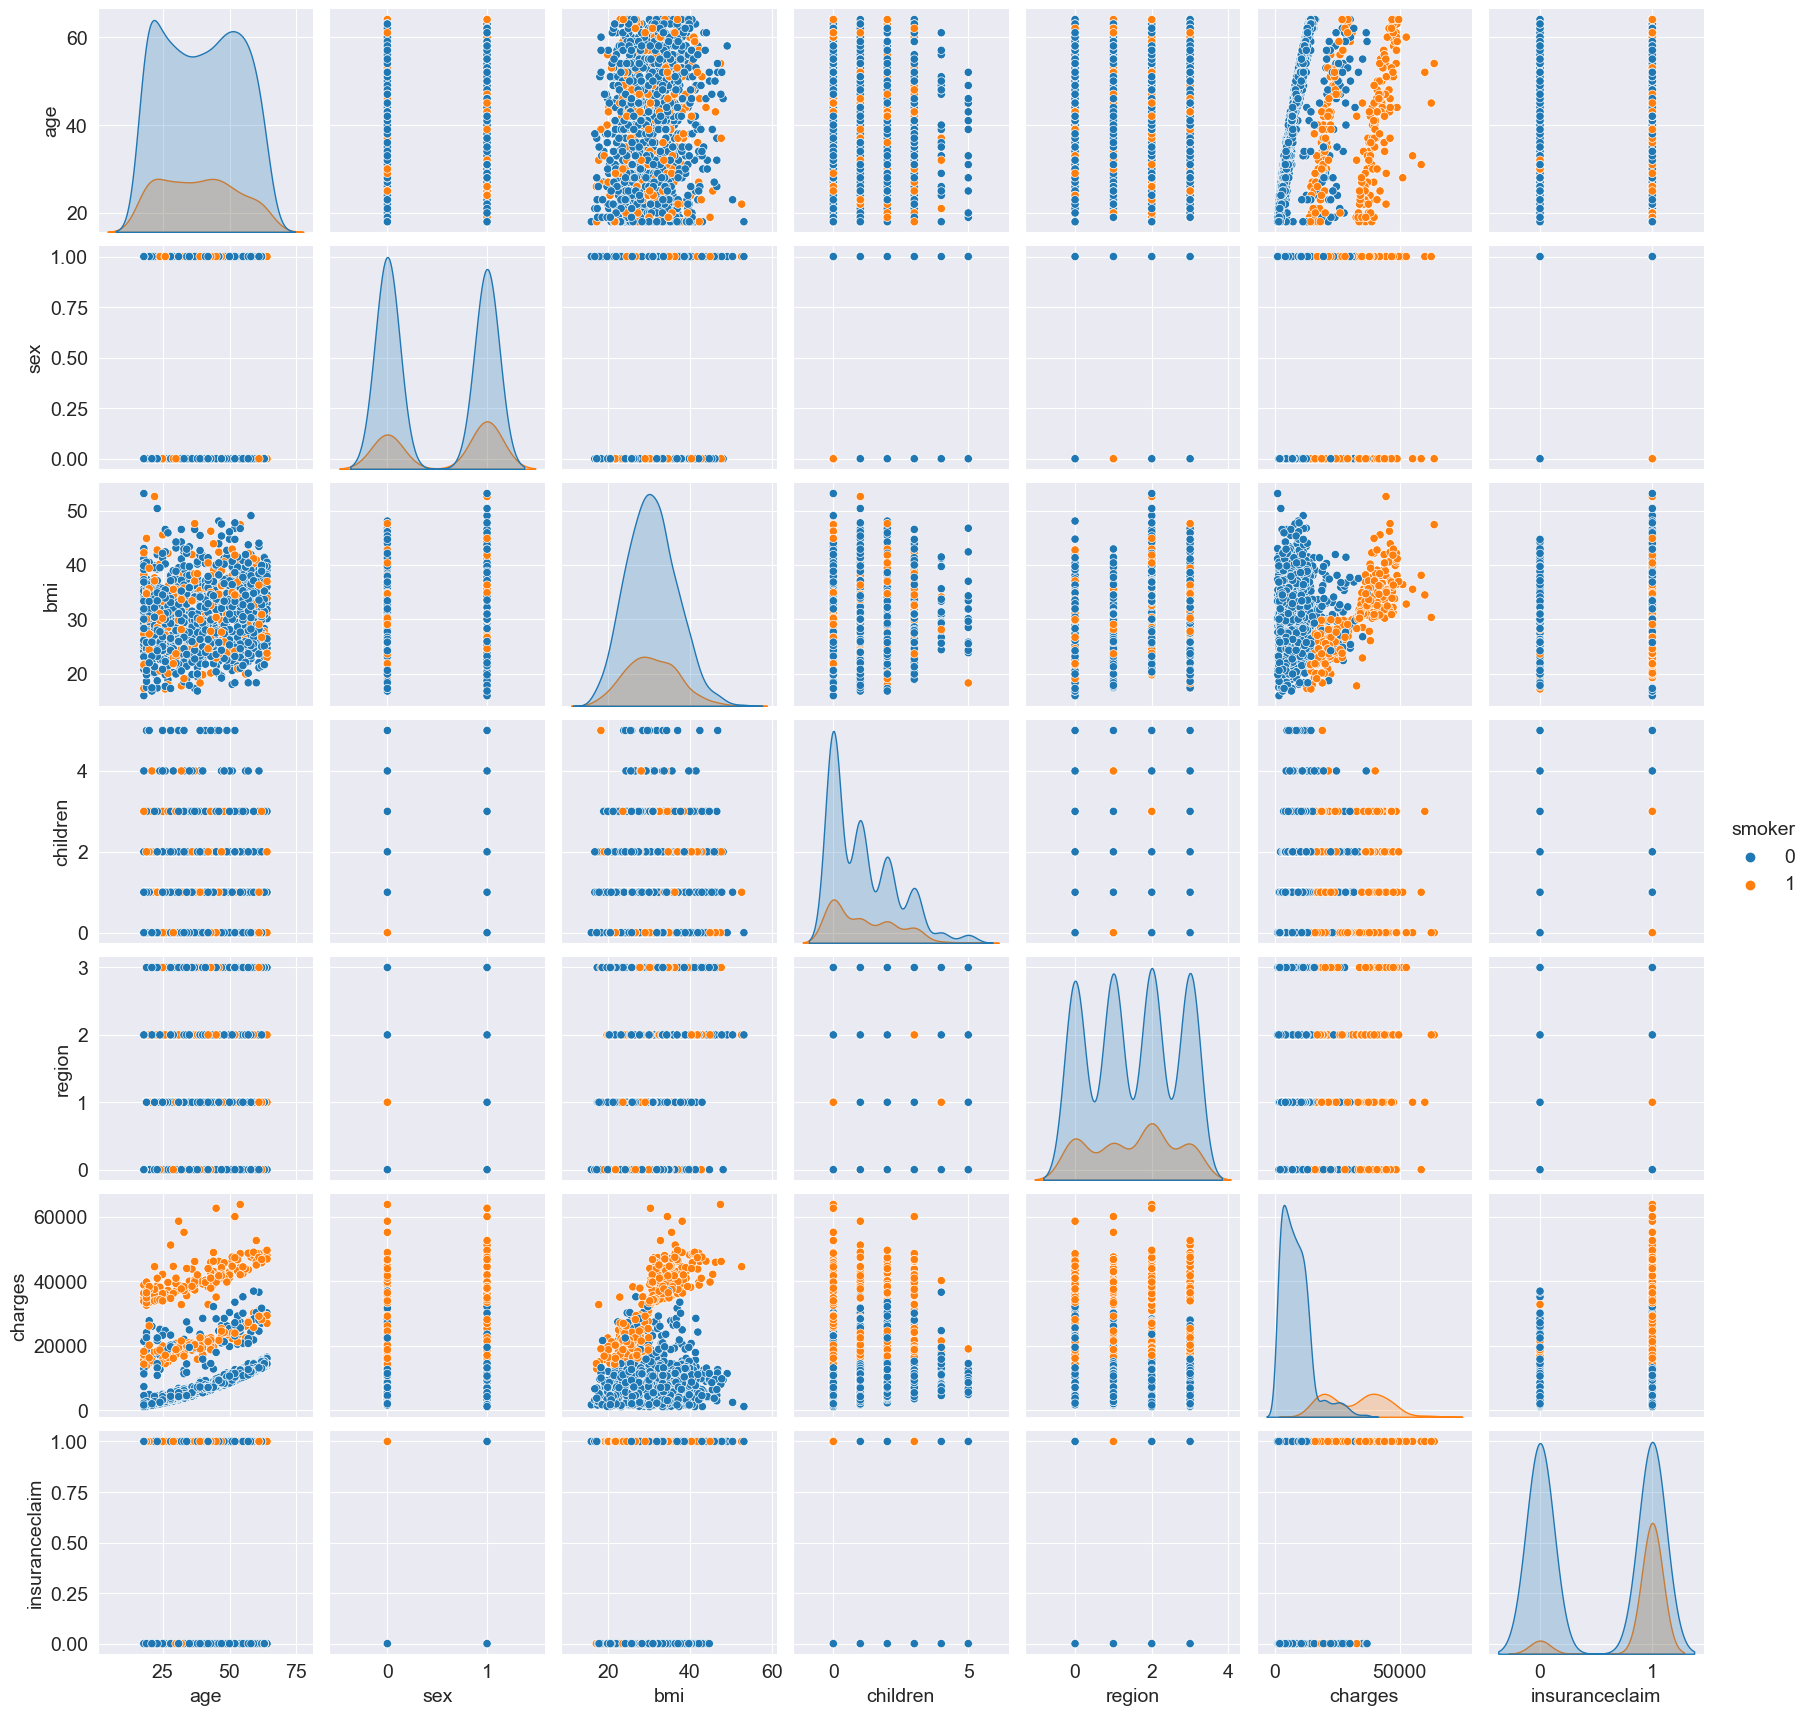

In [ ]:
sns.pairplot(data=df,hue='smoker')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   region            1337 non-null   int64  
 6   charges           1337 non-null   float64
 7   insuranceclaim    1337 non-null   int64  
 8   weight_condition  1337 non-null   object 
dtypes: float64(2), int64(6), object(1)
memory usage: 136.7+ KB


In [ ]:
#Converting object into category, because the values are boolean
df.smoker = df.smoker.astype("category")

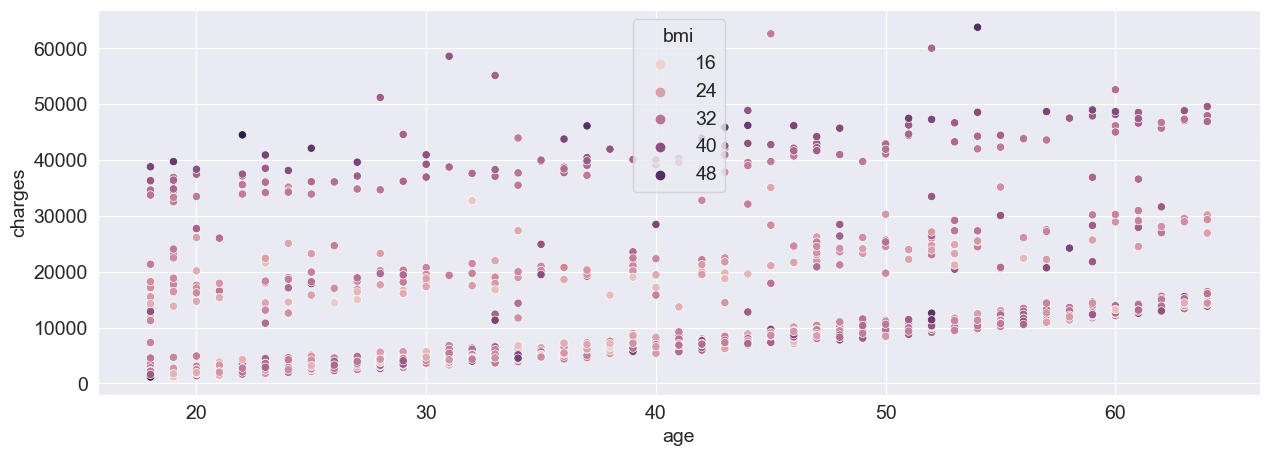

In [ ]:
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['bmi'],color='gray');



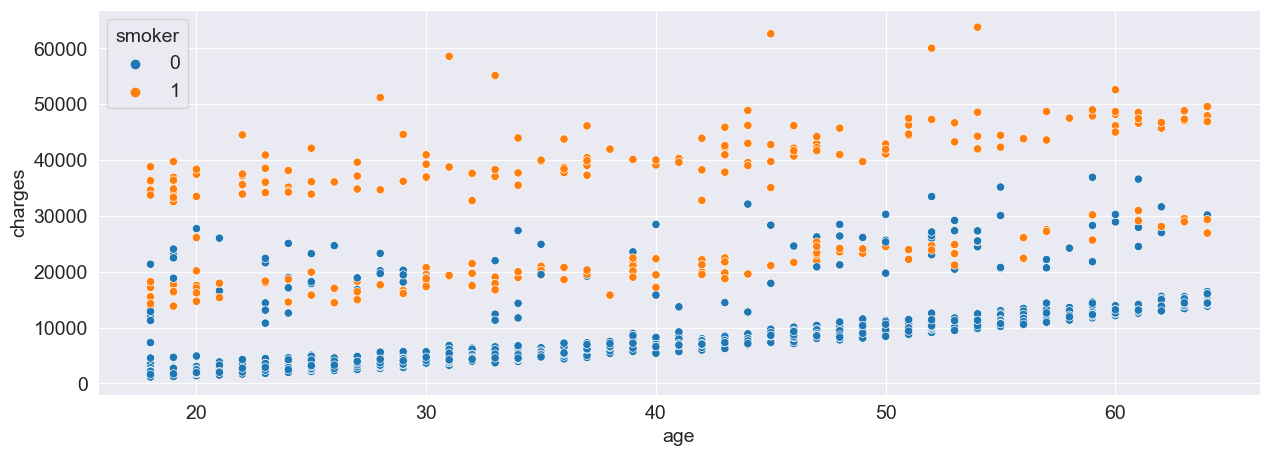

In [ ]:
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'],color='gray');



Train Test Split

In [ ]:
X = df.drop('charges',axis=1)
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
X_train.shape

(935, 7)

In [ ]:
X_test.shape

(402, 7)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train) 
y_pred = linear_regression.predict(X_test) 

In [ ]:
r2_score(y_test,y_pred)

0.7494337780926491

Accuracy of the model is 74.94%

In [ ]:
y_Pred = linear_regression.predict(X_test)
y_Test_Pred = pd.DataFrame({"y_Test": y_test, "y_Pred": y_Pred})
y_Test_Pred.head()

,y_Test,y_Pred
17,2395.17155,2141.814913
1091,11286.53870,11490.449475
273,9617.66245,10950.899334
270,1719.43630,2911.742123
874,8891.13950,8124.095570


In [18]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [28]:
git remote add origin https://github.com/Mohit010698/Insurance-cost.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (1344074147.py, line 1)

<Axes: xlabel='age'>

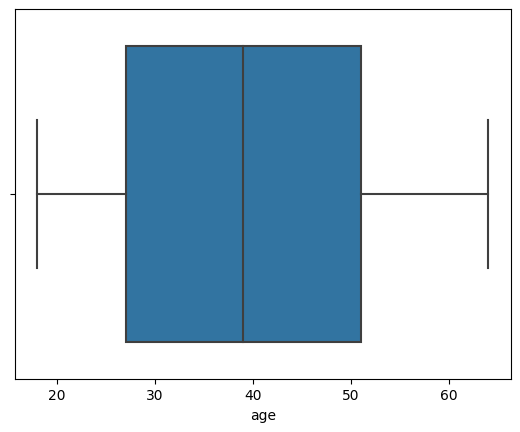

In [ ]:
sns.boxplot(data=df, x='age')

In [ ]:
df.value_counts('age')

age
18    69
19    67
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
dtype: int64